#**Data Storytelling Springboard Project**

[**Heart Dataset**](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

![link text](https://i.gifer.com/MNOu.gif)


#**About this dataset**
For more than a decade, heart disease have claimed the first spot as the leading cause of death in America. 

For more than 30 years, the Centers for Disease Control and Prevention (CDC) has been collecting and examining causes of heart related deaths. This information helps researchers and doctors understand if they need to address growing epidemics in healthcare. The numbers also help them understand how preventive measures may help people live longer and healthier lives.

When a heart attack occurs, the heart muscle that has lost blood supply begins to suffer injury. The amount of damage to the heart muscle depends on the size of the area supplied by the blocked artery and the time between injury and treatment. Heart muscle damaged by a heart attack heals by forming scar tissue.


**Our dataset contain a total of 14 columns, with abbreviations in their column names.**

Lets look at what every column contains information:

Age : Age of the patient

Sex : Sex of the patient

exng: exercise induced angina (1 = yes; 0 = no)

caa: number of major vessels (0-3)

cp : Chest Pain type chest pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic


trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

'oldpeak' = Previous peak or ST depression induced by exercise relative to rest

'slp' = The slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping

'thall' = Thal rate

In [297]:
#imoprt packages and data
import pandas as pd
import numpy as np
from google.colab import files

data = files.upload()

Saving heart.csv to heart (1).csv


In [298]:
df=pd.read_csv('heart.csv')
#df2 = pd.read_csv('o2Saturation.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [299]:
#summary of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In this session, we will be telling a story and analyzing this dataset based on the information provided. At the end we will get to many conclusions.



In [300]:
# Let's be sure our dataset is clean and ready to be explored.
#checking for NaNs
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [301]:
#checking for number of uniques values by col
dict = {}
for i in df.columns:
  dict[i]= df[i].value_counts().shape[0]

pd.DataFrame(dict, index=['Unique Counts']).T

,Unique Counts
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


**Exploratory Analysis and Visualization**

Now, we will be analyzing our data, graphically.

Let's begin by importing necessary plots libaries: matplotlib.pyplot, seaborn

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


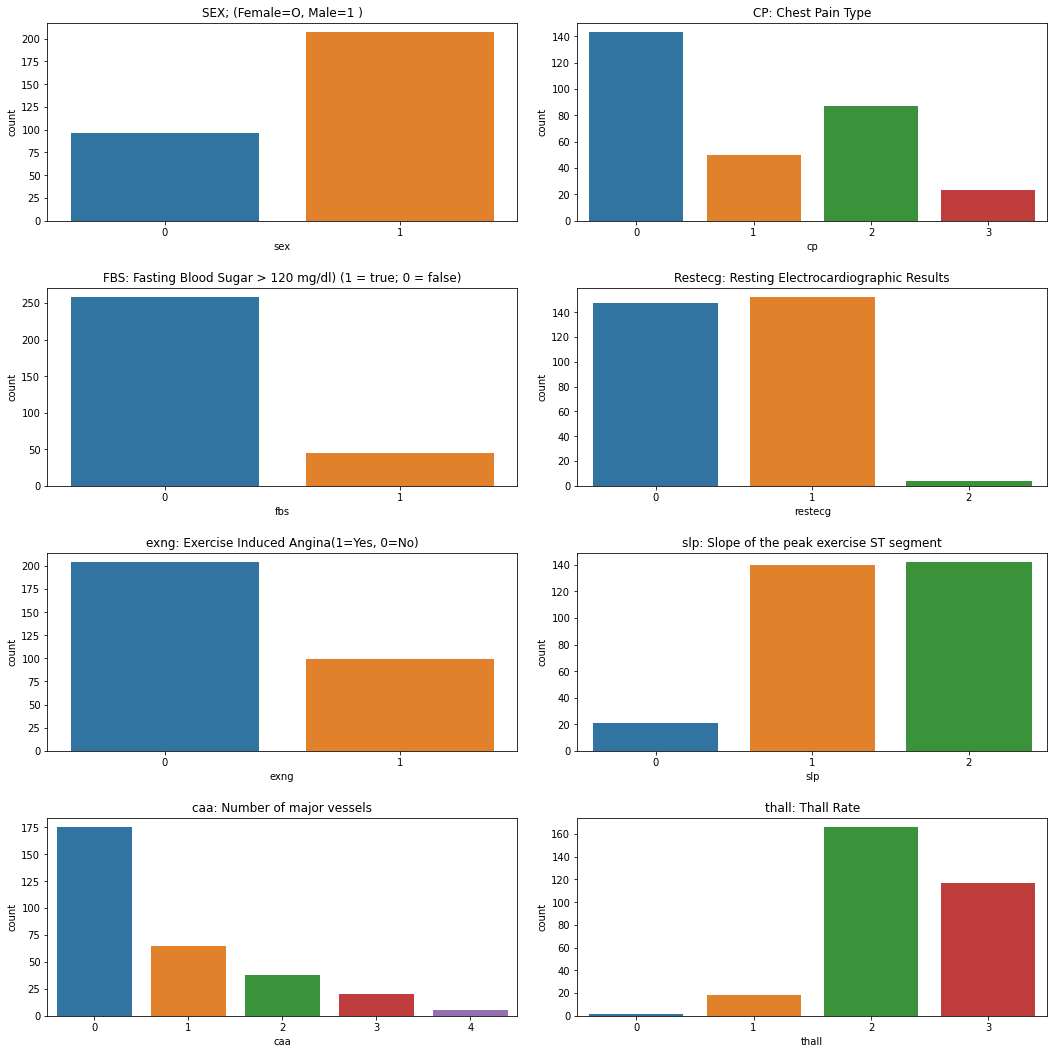

In [303]:
#Univariate Analysis of categorical data
fig, axes = plt.subplots(4,2, figsize=(15,15))

axes[0,0].set_title('SEX; (Female=O, Male=1 )')
sns.countplot(x='sex', data=df, ax= axes[0,0])

axes[0,1].set_title('CP: Chest Pain Type')
sns.countplot(x='cp', data=df, ax=axes[0,1])

axes[1,0].set_title('FBS: Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
sns.countplot(x='fbs', data=df, ax=axes[1,0])

axes[1,1].set_title('Restecg: Resting Electrocardiographic Results')
sns.countplot(x='restecg', data=df, ax=axes[1,1])

axes[2,0].set_title('exng: Exercise Induced Angina(1=Yes, 0=No)')
sns.countplot(x='exng', data=df, ax=axes[2,0])

axes[2,1].set_title('slp: Slope of the peak exercise ST segment')
sns.countplot(df.slp, ax=axes[2,1])

axes[3,0].set_title('caa: Number of major vessels')
sns.countplot(df.caa, ax=axes[3,0])

axes[3,1].set_title('thall: Thall Rate')
sns.countplot(df.thall, ax=axes[3,1])

plt.tight_layout(pad=2)

  **Observations from the above Univariate analysis of numerical variables**
    
  * Male patients are more than number of female patients.
  * Most of the patient are suffering with typical anginal chest pain (cp=0).
  * Most people have their fasting blood sugar lesser than 120mg/dl.
  * Most people have either normal or abnormal ST-T electrocardiographic wave.
  * Lesser people are suffering with exercise induced angina.
  * Almost 125 people have 0 major vessel.

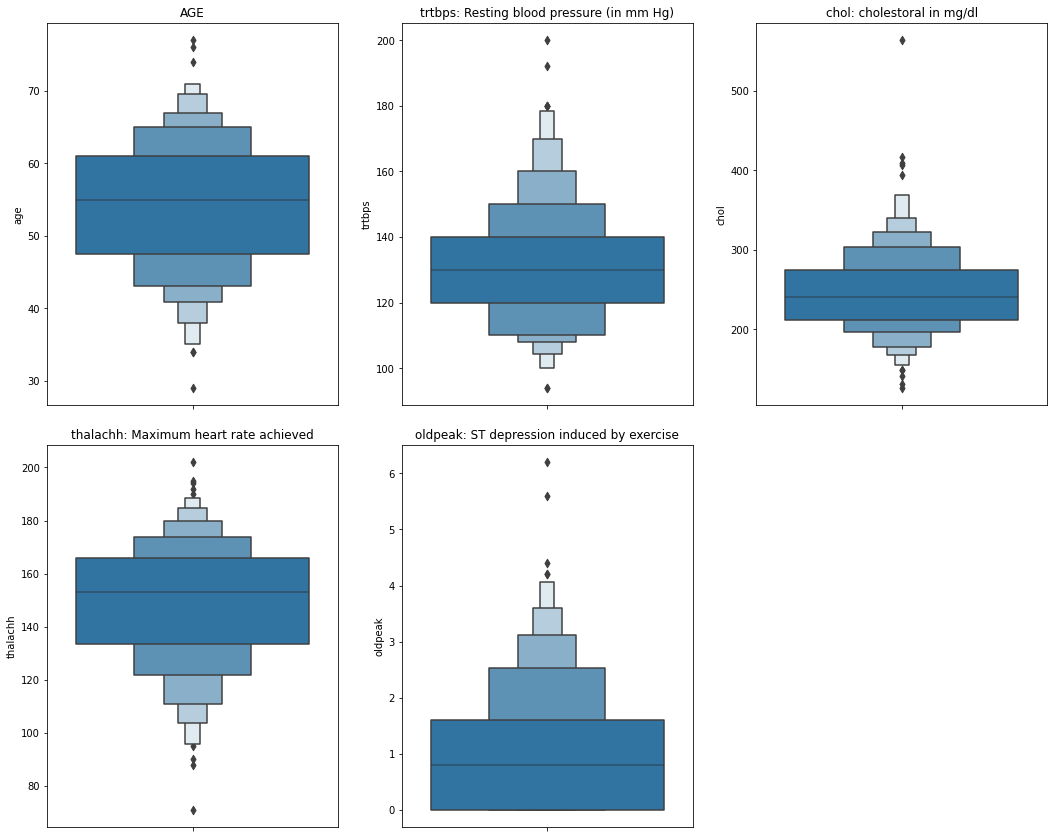

In [304]:
#Univariate Analysis of numerical data using boxplots

fig, axes = plt.subplots(2, 3, figsize=(15,12))

axes[0,0].set_title('AGE')
sns.boxenplot(y='age', data=df, ax=axes[0,0]),

axes[0,1].set_title('trtbps: Resting blood pressure (in mm Hg)')
sns.boxenplot(y='trtbps', data=df, ax=axes[0,1])

axes[0,2].set_title('chol: cholestoral in mg/dl')
sns.boxenplot(y='chol', data=df, ax=axes[0,2])

axes[1,0].set_title('thalachh: Maximum heart rate achieved')
sns.boxenplot(y='thalachh', data=df, ax=axes[1,0])

axes[1,1].set_title('oldpeak: ST depression induced by exercise')
sns.boxenplot(y='oldpeak', data=df, ax=axes[1,1])

axes[1,2].set_visible(False)
plt.tight_layout(pad=2)

**Deductuons from the above Univariate analysis of the numerical variables**

* Majority of patients are between the age (48-61)
* Majority of patients have their blood pressure between (120-140)
* Majority of patients have their cholestrol level between (220-260)
* Majority of patients have their heart rate between (135-165)


##Bivariate Analysis 1

Having a strong understanding of our data, let us form our hypothesis based on our knowledge on 'age' and heart 'attack' :

It seems obvious that, "the older you get, the more likely you have an heart attack". We will form our first Hypothesis to confirm if it's indeed a fact.

**H0: Older people are more likely to have an heart attack** 

In [305]:
age_output = df[['age', 'output']].groupby('age').sum()
age_output.T

age,29,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,76,77
output,1,2,2,2,2,3,1,9,7,5,8,6,4,3,4,3,4,9,9,6,10,3,5,7,7,5,3,1,4,3,6,4,4,3,2,2,1,3,1,1,0


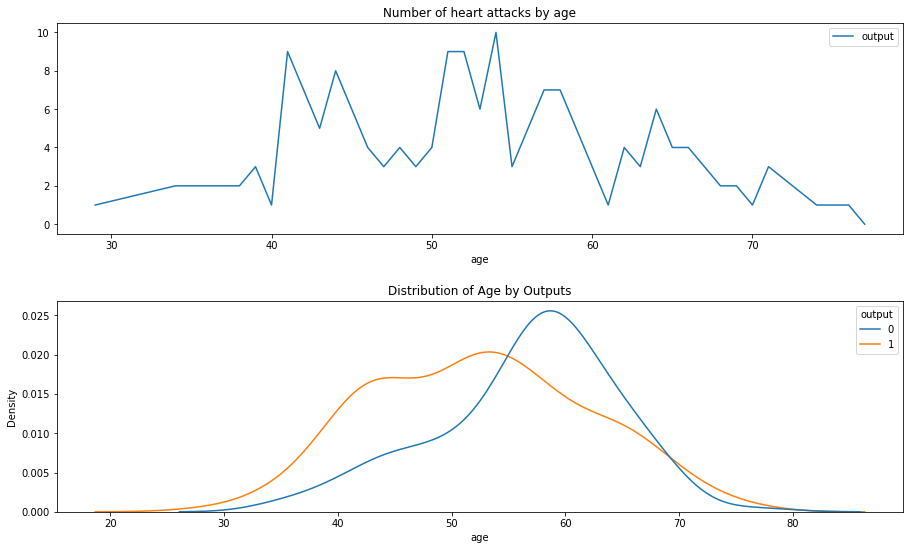

In [306]:
#lets group the sum of heart attacks by age and get a distribution of age and output
fig, axes = plt.subplots(2, figsize=(13,8))

axes[0].set_title('Number of heart attacks by age')
sns.lineplot(data= age_output, ax= axes[0])

axes[1].set_title('Distribution of Age by Outputs')
sns.kdeplot(x='age', data=df, hue='output')

plt.tight_layout(pad=2)

**Deductions from the above:**
* We see a spike in heart attacks at **age 40** till **age 60**. 
*Also, observe the reversal in trend beyond **age 55** and the right-skewed '0 output' kdeplot distribution could indicate a less likely chance of getting a heart attack beyond that age but more data should be collected for further investigations beyond that age due to the limitations of our age counts from Age univariate box plot above.

Thus, **we fail to reject our Hypothesis H0** with a caveat:
* *Middle age(Ages 35 - 55) group are most likely to have an heart attack*


##Bivariate Analysis 2
Next, lets form an Hypothesis between 'sex' and the likelihood of having a heart attack

**H1: Men are more likely to have an heart attack than women**

In [307]:
#Let us extract variables that will help investigate our hypothesis and split into differents dataframes by sex
import numpy as np
df2 = df[['age', 'output', 'sex']].sort_values(by =['age']).reset_index(drop=True)

df_sex1 = df2[df2['sex']==1]
df_sex1['cumsum_output']= df_sex1['output'].cumsum()

df_sex0 = df2[df2['sex']==0]
df_sex0['cumsum_output']= df_sex0['output'].cumsum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


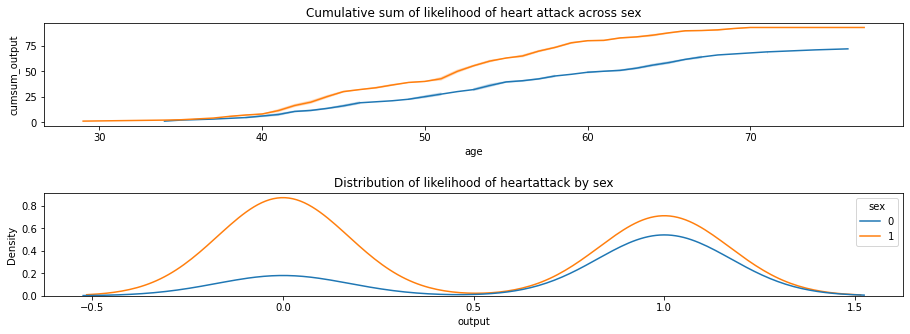

In [308]:
#Plot the distribution of sex by output and also investigate the rate of increase of likelihoood of heart attack across ages by sex

fig, axes = plt.subplots(2, figsize=(13,5))

axes[0].set_title('Cumulative sum of likelihood of heart attack across sex')
sns.lineplot(x='age', y='cumsum_output', data= df_sex0, ax=axes[0])
sns.lineplot(x='age', y='cumsum_output', data= df_sex1, ax=axes[0])


axes[1].set_title('Distribution of likelihood of heartattack by sex')
sns.kdeplot(df.output, data=df, hue='sex', ax=axes[1])

plt.tight_layout(pad=2)

In [309]:
df[['sex','output']].groupby('sex').mean().sort_values('output')

,output
sex,
1,0.449275
0,0.750000


**Deductions from the above**
* We see that rate of likelihood of having an heart attack rises faster among  males(sex=1)
* Also, the density for males(sex=1) is significantly higher than females(sex=0)
* We see males(sex 0) are more likely to have an heartattack 75% of the time while females(sex 1) has only 44.9275% chance.

Thus, **We fail to reject our Null Hypothesis H1** as the data shows evidence that men(sex=1) are more likely to have an heart attack than women(sex=0)

## Bivariate Analysis 3
We will form an hypothesis to see relationship between exng: Exercise Induced angina and likelihood of heart attack

**H2: Exercise Induced Angina(exng) is a sign for increase likelihood of heart attack**


Text(0.5, 0, ' exng(0 = no; 1 = yes)')

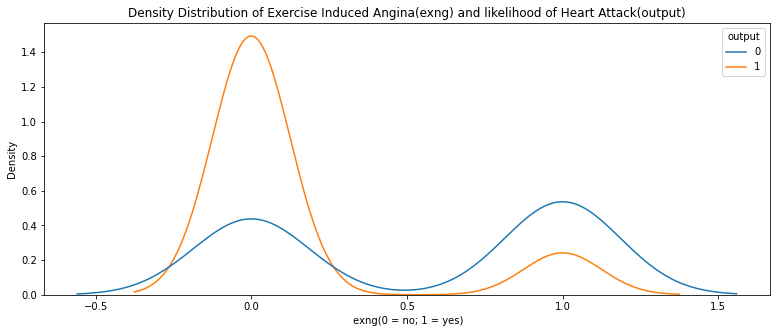

In [310]:
#Let's plot the distribution of exng by output
#exng: exercise induced angina (1 = yes; 0 = no)

plt.figure(figsize=(13,5))
sns.kdeplot(x='exng', data=df, hue= 'output')
plt.title('Density Distribution of Exercise Induced Angina(exng) and likelihood of Heart Attack(output)')
plt.xlabel(' exng(0 = no; 1 = yes)')

**Deductions from above:**
* We see immeidatley that **exng = 0** proves increase likelihood of heart attack
* In simpler terms, exercise induced chestpain is not necessarily a sign for increaselikelihood of heart attack
* In fact, non-exercise induced angina could increse likelihood of an heart attack

Thus, **we reject null Hypothesis H2** as our data proves otherwise

##Bivariate Analysis 4
As seen in the introducton and barplots above, we have 4 types of types of chestpain, **cp**.
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

Let's investigate to see which chestpain is most likely to increase likelihood of heart attack


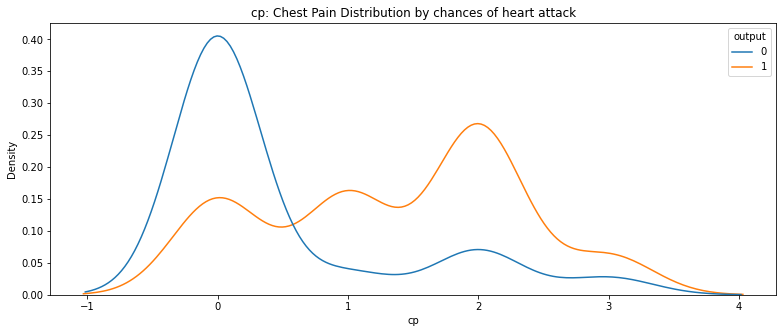

In [311]:
plt.figure(figsize=(13,5))
sns.kdeplot(x='cp', data=df, hue='output')
plt.title('cp: Chest Pain Distribution by chances of heart attack')
plt.show()

**Observe that:**
* Chest pain (type 0) is least likely to cause a heart attack
* Chest pain (type 2) is most likely to cause an heart attack